# 서울시 주요 113 장소 실시간 데이터 (3~5분 단위로 갱신)

Google colab에서 실행함. (113 장소에서 지하철역은 43개임)

## 라이브러리 불러오기

In [1]:
!pip install xmltodict

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import xmltodict
import requests
import datetime
import warnings
warnings.filterwarnings('ignore')

## API 연결
- 서울 실시간 도시 데이터 ( https://data.seoul.go.kr/dataList/OA-21285/A/1/datasetView.do )

In [3]:
# 접속 확인
SERVICE_KEY = '6e55537454786a7838396654456b4c'
url_default = 'http://openapi.seoul.go.kr:8088/{}/xml/citydata/'.format(SERVICE_KEY)

req_test = requests.get(url_default)
print(req_test)

<Response [200]>


- 요청인자 (url 입력값): http://openapi.seoul.go.kr:8088/인증키/xml/citydata/시작페이지(정수)/끝페이지(정수)/장소명or장소코드

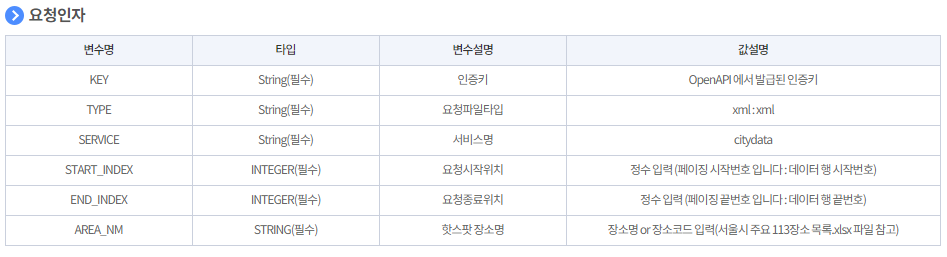

## 호출함수 정의

In [4]:
# API 호출 및 텍스트 가져오기
def call_API(start_idx=1, end_idx=1, loc_code='POI014'):
  """
  start_idx: (int) 페이징 시작번호
  end_idx: (int) 페이징 끝번호
  loc_code: (str) 장소명 or 장소코드 ;ex 'POI014': 강남역

  return: url의 xml 데이터를 requests로 get하고 텍스트만 반환
  """

  url = url_default + str(start_idx) + '/' + str(end_idx) + '/' + loc_code
  req = requests.get(url)
  if req.status_code == 200:
    return req.text
  else:
    print('API 호출 불가')
    return None

## API 호출 예시

In [5]:
text = call_API()
data_dict = xmltodict.parse(text)

In [6]:
data_dict['SeoulRtd.citydata']['CITYDATA']['LIVE_PPLTN_STTS']['LIVE_PPLTN_STTS'].keys()

dict_keys(['AREA_CONGEST_LVL', 'AREA_CONGEST_MSG', 'AREA_PPLTN_MIN', 'AREA_PPLTN_MAX', 'MALE_PPLTN_RATE', 'FEMALE_PPLTN_RATE', 'PPLTN_RATE_0', 'PPLTN_RATE_10', 'PPLTN_RATE_20', 'PPLTN_RATE_30', 'PPLTN_RATE_40', 'PPLTN_RATE_50', 'PPLTN_RATE_60', 'PPLTN_RATE_70', 'RESNT_PPLTN_RATE', 'NON_RESNT_PPLTN_RATE', 'REPLACE_YN', 'PPLTN_TIME', 'FCST_YN'])

In [7]:
population_df = pd.DataFrame([data_dict['SeoulRtd.citydata']['CITYDATA']['LIVE_PPLTN_STTS']['LIVE_PPLTN_STTS']])

In [8]:
LNG = float(data_dict['SeoulRtd.citydata']['CITYDATA']['SUB_STTS']['SUB_STTS'][0]['SUB_STN_X'])
LAT = float(data_dict['SeoulRtd.citydata']['CITYDATA']['SUB_STTS']['SUB_STTS'][0]['SUB_STN_Y'])

In [9]:
population_df['역이름'] = data_dict['SeoulRtd.citydata']['CITYDATA']['AREA_NM']
population_df['지역코드'] = data_dict['SeoulRtd.citydata']['CITYDATA']['AREA_CD']
population_df['경도'] = np.round(LNG, 5)
population_df['위도'] = np.round(LAT, 5)
population_df.rename(columns={'PPLTN_TIME': '시간', 'AREA_CONGEST_LVL': '혼잡도', 'AREA_CONGEST_MSG': '메시지'}, inplace=True)

population = population_df[['역이름', '지역코드', '위도', '경도', '시간', '혼잡도', '메시지']]

In [10]:
population

,역이름,지역코드,위도,경도,시간,혼잡도,메시지
0,강남역,POI014,37.49809,127.028,2023-09-01 16:25,약간 붐빔,사람들이 몰려있을 가능성이 크고 붐빈다고 느낄 수 있어요. 인구밀도가 높은 구간에서...


## 반복 호출 및 데이터프레임 작성 (43번 호출하니 호출 제한 걸릴 수도 있어요. 자주하진 말아주세요.)

- 원하는 지역코드를 Area_cd_list에 문자열로 넣어주세요

In [11]:
Area_cd_list = ['POI013', 'POI014', 'POI015', 'POI016', 'POI017', 'POI018', 'POI019', 'POI020', 'POI021', 'POI022', 'POI023', 'POI024', 'POI025', 'POI026', 'POI027', 'POI028', 'POI029', 'POI030', 'POI031', 'POI032',
'POI033', 'POI034', 'POI035', 'POI036', 'POI037', 'POI038', 'POI039', 'POI040', 'POI041', 'POI042', 'POI043', 'POI045', 'POI046', 'POI047', 'POI048', 'POI049', 'POI050', 'POI051', 'POI052', 'POI053', 'POI054', 'POI055', 'POI056']

In [12]:
len(Area_cd_list)

43

In [13]:
for i, area in enumerate(Area_cd_list):
  text = call_API(loc_code=area)
  data_dict = xmltodict.parse(text)
  population_df = pd.DataFrame([data_dict['SeoulRtd.citydata']['CITYDATA']['LIVE_PPLTN_STTS']['LIVE_PPLTN_STTS']])
  try:
      LNG = float(data_dict['SeoulRtd.citydata']['CITYDATA']['SUB_STTS']['SUB_STTS'][0]['SUB_STN_X'])
      LAT = float(data_dict['SeoulRtd.citydata']['CITYDATA']['SUB_STTS']['SUB_STTS'][0]['SUB_STN_Y'])
      population_df['역이름'] = data_dict['SeoulRtd.citydata']['CITYDATA']['AREA_NM']
      population_df['지역코드'] = data_dict['SeoulRtd.citydata']['CITYDATA']['AREA_CD']
      population_df['경도'] = np.round(LNG, 5)
      population_df['위도'] = np.round(LAT, 5)
      population_df.rename(columns={'PPLTN_TIME': '시간', 'AREA_CONGEST_LVL': '혼잡도', 'AREA_CONGEST_MSG': '메시지'}, inplace=True)
      temp1 = population_df[['역이름', '지역코드', '위도', '경도', '시간', '혼잡도', '메시지']]

  except:
    pass

  if i == 0:
    population = temp1
  else:
    temp2 = pd.concat([population, temp1])
    population = temp2

## 데이터 프레임 정리

In [14]:
population.reset_index(inplace=True)

In [17]:
population.drop('index', axis=1, inplace=True)

In [18]:
population.head()

,역이름,지역코드,위도,경도,시간,혼잡도,메시지
0,가산디지털단지역,POI013,37.48153,126.88261,2023-09-01 16:25,붐빔,사람들이 몰려있을 가능성이 매우 크고 많이 붐빈다고 느낄 수 있어요. 인구밀도가 높...
1,강남역,POI014,37.49809,127.02800,2023-09-01 16:25,약간 붐빔,사람들이 몰려있을 가능성이 크고 붐빈다고 느낄 수 있어요. 인구밀도가 높은 구간에서...
2,건대입구역,POI015,37.54041,127.06920,2023-09-01 16:25,여유,사람이 몰려있을 가능성이 낮고 붐빔은 거의 느껴지지 않아요. 도보 이동이 자유로워요.
3,건대입구역,POI015,37.54041,127.06920,2023-09-01 16:25,여유,사람이 몰려있을 가능성이 낮고 붐빔은 거의 느껴지지 않아요. 도보 이동이 자유로워요.
4,고속터미널역,POI017,37.50455,127.00512,2023-09-01 16:25,붐빔,사람들이 몰려있을 가능성이 매우 크고 많이 붐빈다고 느낄 수 있어요. 인구밀도가 높...


In [19]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   역이름     43 non-null     object 
 1   지역코드    43 non-null     object 
 2   위도      43 non-null     float64
 3   경도      43 non-null     float64
 4   시간      43 non-null     object 
 5   혼잡도     43 non-null     object 
 6   메시지     43 non-null     object 
dtypes: float64(2), object(5)
memory usage: 2.5+ KB
